# Capstone Two: Modeling

I will continue working on Credit Card Fraud data, I am training a model that help detect fraudulent transactions before they occure on the client's bank account. The three models I will be training in this notebook are K-Nearest-Neighbor(KNN), Support Vector Machine(SVM), and Random Forest.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

### Load data
The data I already have saved in my device, I loaded it to my notebook using pandas method .read_csv() and printed the first five rows of the data for a quick look on the features I have available.

In [2]:
# calling pandas .read_csv() and head() method
df = pd.read_csv(r"C:\Users\mutha\Downloads\preprocessed_data2.csv")
df.head()

,merchant,category,amt,city,state,lat,long,city_pop,age,merch_lat,merch_long,is_fraud,day,year,month,hour
0,Rau and Sons,grocery_pos,314.70,Glendale,CA,34.1556,-118.2322,172817,83,33.283670,-118.654974,1,Sat,2019,9,3
1,"Connelly, Reichert and Fritsch",gas_transport,43.51,Mesa,ID,44.6255,-116.4493,129,59,45.456663,-116.555030,0,Wed,2020,1,6
2,Friesen Inc,shopping_pos,795.01,Parker Dam,CA,34.2980,-114.1560,126,32,34.922036,-113.901876,1,Sun,2019,1,23
3,"Mosciski, Ziemann and Farrell",shopping_net,8.25,Hooper,NE,41.6414,-96.5232,1745,51,42.557041,-96.231715,0,Sun,2020,2,14
4,Brown PLC,misc_net,715.01,Carroll,NE,42.2770,-97.1926,566,49,42.175045,-97.983932,1,Sun,2020,2,23


### Data exploration
This step gives an insight look of the data. it's necessary to learn about the data size and types before moveing on towerds modeling. since I have data expolration done on this data on the previous steps, I will go straight to data encoding and model preparing.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564 entries, 0 to 3563
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    3564 non-null   object 
 1   category    3564 non-null   object 
 2   amt         3564 non-null   float64
 3   city        3564 non-null   object 
 4   state       3564 non-null   object 
 5   lat         3564 non-null   float64
 6   long        3564 non-null   float64
 7   city_pop    3564 non-null   int64  
 8   age         3564 non-null   int64  
 9   merch_lat   3564 non-null   float64
 10  merch_long  3564 non-null   float64
 11  is_fraud    3564 non-null   int64  
 12  day         3564 non-null   object 
 13  year        3564 non-null   int64  
 14  month       3564 non-null   int64  
 15  hour        3564 non-null   int64  
dtypes: float64(5), int64(6), object(5)
memory usage: 445.6+ KB


In [4]:
# here I am selecting categorical columns and encode them using pandas method .get_dummies()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
encoded_df = pd.get_dummies(df, columns=cat_cols)
encoded_df.head()

,amt,lat,long,city_pop,age,merch_lat,merch_long,is_fraud,year,month,...,state_UT,state_WA,state_WY,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,314.70,34.1556,-118.2322,172817,83,33.283670,-118.654974,1,2019,9,...,False,False,False,False,False,True,False,False,False,False
1,43.51,44.6255,-116.4493,129,59,45.456663,-116.555030,0,2020,1,...,False,False,False,False,False,False,False,False,False,True
2,795.01,34.2980,-114.1560,126,32,34.922036,-113.901876,1,2019,1,...,False,False,False,False,False,False,True,False,False,False
3,8.25,41.6414,-96.5232,1745,51,42.557041,-96.231715,0,2020,2,...,False,False,False,False,False,False,True,False,False,False
4,715.01,42.2770,-97.1926,566,49,42.175045,-97.983932,1,2020,2,...,False,False,False,False,False,False,True,False,False,False


In [5]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564 entries, 0 to 3563
Columns: 886 entries, amt to day_Wed
dtypes: bool(875), float64(5), int64(6)
memory usage: 3.3 MB


### Data splitting

In [6]:
# spliting data data into variable X and the target y
X = encoded_df.drop(columns=['is_fraud'])
y = encoded_df['is_fraud']

In [7]:
# applying train_test_split to split my data into train data 80% and test data 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

### Data scaling

In [8]:
# I scale the data using Standard Scaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### K-Nearest Neighbor (KNN)

In [9]:
# I will start by initiating an empty list for train scores and test scores
train_scores = []
test_scores = []
# Here I will loob over a range of (1, 10) and fit that range to KNN to get the train and test scores
for i in range(1,10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
# Next I will print the scores    
print("The train scores is:", train_scores)
print("The test scores is:", test_scores)

The train scores is: [1.0, 0.7751666082076465, 0.7884952648193616, 0.7537706068046299, 0.7418449666783584, 0.7365836548579446, 0.7151876534549281, 0.7190459487898982, 0.6909856190810242]
The test scores is: [0.6086956521739131, 0.6002805049088359, 0.6185133239831697, 0.6002805049088359, 0.5918653576437588, 0.6044880785413744, 0.5960729312762973, 0.6115007012622721, 0.6002805049088359]


In [10]:
# let's now get the max score of the train data
train_scores_max = train_scores.index(max(train_scores))
max_train_num = train_scores_max + 1
print("The max number of train scores is:", max_train_num)
# similarly getting the max score of the test data
test_scores_max = test_scores.index(max(test_scores))
max_test_num = test_scores_max + 1
print("The max number of the test scores is:", max_test_num)

The max number of train scores is: 1
The max number of the test scores is: 3


<Axes: >

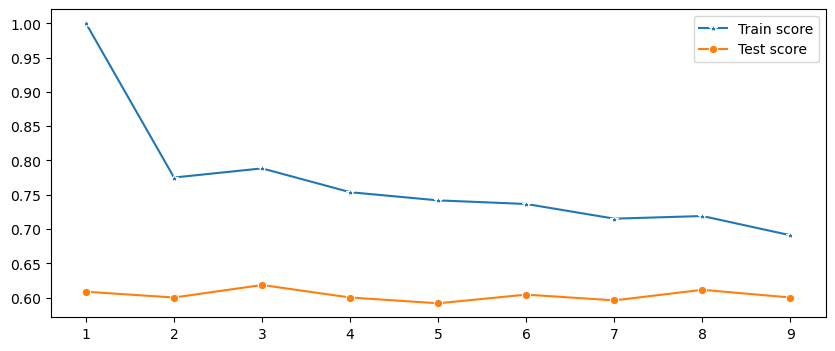

In [11]:
# plotting the train and test data will give us a visual look of the scores
plt.figure(figsize=(10, 4))
sns.lineplot(x=range(1,10), y=train_scores, marker='*', label='Train score')
sns.lineplot(x=range(1,10), y=test_scores, marker='o', label='Test score')

From the chart above we can identify that n_neighbors=3, so we will use that in our KNN model and fit it to our data and get the accuracy of it's prediction.

In [12]:
# calling KNeighborsClassifier with n_neighbors=3 and fit it to our train data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
# after fitting the model, time to call .predict() on the test data and print the accuracy of the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN model predictions accuracy is:", accuracy)

KNN model predictions accuracy is: 0.6185133239831697


The accuracy of the KNN model is 62%, below I will be showing the confusion matrix of the model.

Text(0.5, 1.0, 'Confusion Matrix heatmap')

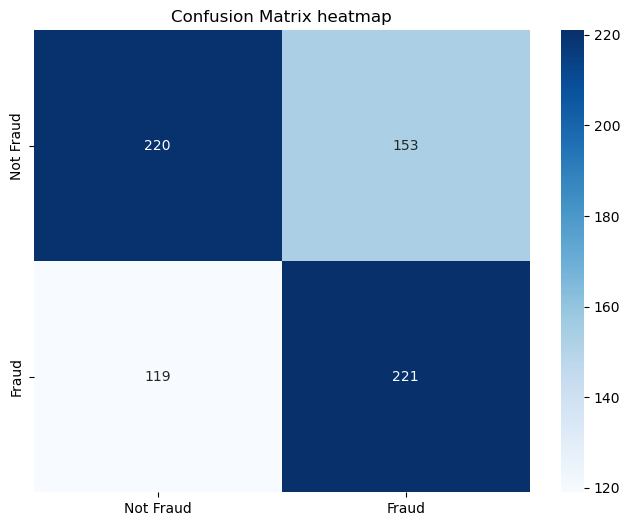

In [13]:
# I will be getting the confusion matrix using the method confusion_matrix() and assign it to CM
CM = confusion_matrix(y_test, y_pred)
# plotting a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix heatmap')

## Model evaluation 

In [15]:
# On here I will using cross validation and roc_auc to evaluate the model
cv_scores_train = cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_test = cross_val_score(knn, X_test, y_test, cv=5, scoring='roc_auc')
print(cv_scores_test)
# Getting the mean of the scores
cv_scores_train_mean = cv_scores_train.mean()
cv_scores_test_mean = cv_scores_test.mean()
print("Mean cross validation train score is:", cv_scores_train_mean)
print("Mean cross validation test score is:", cv_scores_test_mean)

[0.64970588 0.61362745 0.68098039 0.62162162 0.623907  ]
Mean cross validation train score is: 0.622319112540281
Mean cross validation test score is: 0.6379684684684686


As we saw above after applying cross-validation and auc-roc on the KNN model we got slight improvment to our model from 62% to a mean score of 63%.

## Support Vector Machine (SVM)

In [18]:
# Here I apply SVM on my train and test data
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
# getting predictions 
y_pred_svm = svm.predict(X_test)
print("The accuracy of the SVM model is:", accuracy_score(y_test, y_pred_svm))
# getting the confusion matrix of the model
CM = confusion_matrix(y_test, y_pred_svm)
print("The confusion matrix of the svm model is:", CM)

The accuracy of the SVM model is: 0.7643758765778401
The confusion matrix of the svm model is: [[273 100]
 [ 68 272]]


The accuracy of Support Vector Machine (SVM) is 76%, let's take a visual look on the confusion matrix.

Text(0.5, 1.0, 'Confusion Matrix Heatmap SVM model')

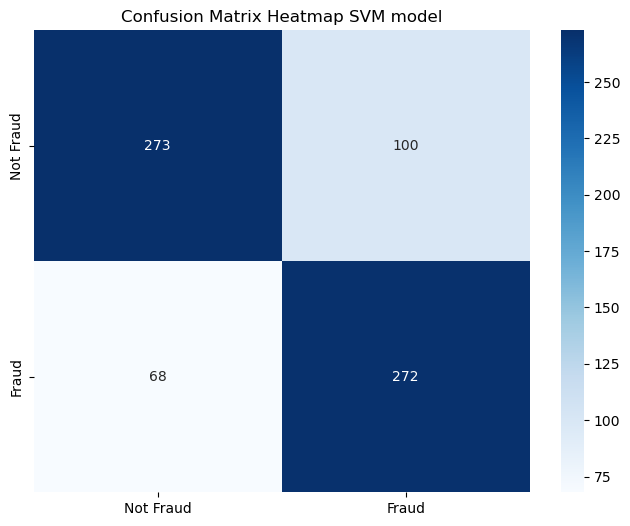

In [20]:
# plotting a heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix Heatmap SVM model")

## Model evaluation

In [24]:
# I will be using cross-validation and auc-roc again on SVM model
cv_score_train = cross_val_score(svm, X_train, y_train, cv=5, scoring='roc_auc')
cv_score_test = cross_val_score(svm, X_test, y_test, cv=5, scoring='roc_auc')
print("The accuracy of the test data is:", cv_score_test)
# getting the mean of the scores
cv_score_train_mean = cv_score_train.mean()
cv_score_test_mean = cv_score_test.mean()
print("The CV mean score of the train data is:", cv_score_train_mean)
print("The CV mean score of the test data is:", cv_score_test_mean)

The accuracy of the test data is: [0.79843137 0.77352941 0.75235294 0.7104531  0.70826709]
The CV mean score of the train data is: 0.8387334069630199
The CV mean score of the test data is: 0.7486067832538421


The model is performing slightly better after applying model evaluation, before evaluation score is 76% and after evaluation score is 80% with a mean of score of 75%

## Random Forest

#### GridSearchCV
Along with this model I will use GridSearchCV to find the best hyperparameters, and then apply them on the Random Forest model, then print out the accuracy of the model.  

In [25]:
# First specifing a range of (1,50) to the param_grid
param_grid = {'n_estimators':np.arange(1,50)}
# initiate the model
RFC = RandomForestClassifier()
# Here I am using 5 folds cross-validation
RFC_cv = GridSearchCV(RFC, param_grid, cv=5)
RFC_cv.fit(X_train, y_train)
# Time to print out the best score and best params
print("Best score is:", str(RFC_cv.best_score_))
print("Best parameters is:", str(RFC_cv.best_params_))

Best score is: 0.9249393185239807
Best parameters is: {'n_estimators': 41}


In [28]:
# Now I have the best parameters number of 41, so I apply that to n_estimators
rfc = RandomForestClassifier(n_estimators=41, random_state=42)
rfc.fit(X_train, y_train)
# getting the accuracy of the model
y_pred = rfc.predict(X_test)
print("The accuracy of RandomForestClassifier is:", accuracy_score(y_test, y_pred))
# getting the confusion matrix
CM = confusion_matrix(y_test, y_pred)
print("The confusion matrix is:", CM)

The accuracy of RandomForestClassifier is: 0.9467040673211781
The confusion matrix is: [[358  15]
 [ 23 317]]


The Random Forest model accuracy is 94%, as usual let's look at the heatmap of the confusion matrix.

Text(0.5, 1.0, 'Confusion Matrix Heatmap RandomForestClassifier')

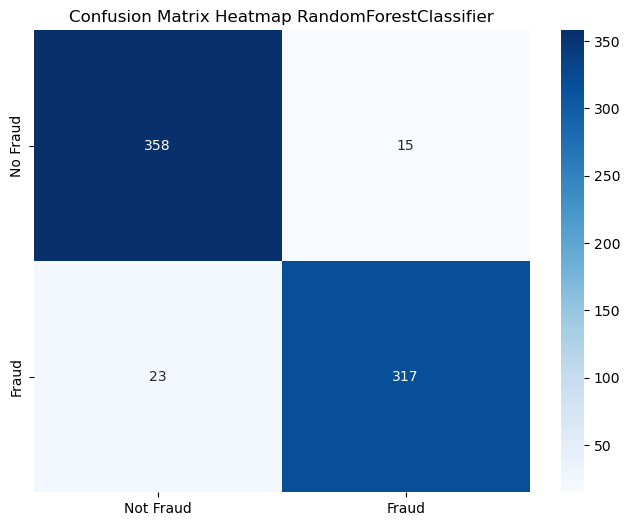

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title("Confusion Matrix Heatmap RandomForestClassifier")

# Summary

### Importing libraries:

### Data Loading:

### Data Exploration:

### Data Splitting:

### Data Scaling:

## K-Nearest Neighbor (KNN)
I applied KNN model and the data and had an accuracy result of 62%. Performed model evaluation on KNN using Cross Validation and Auc-Roc that slighlty improved my model performance to 63%.

## Support Vector Machine (SVM)
Support vector machine carried out a better accuracy result then KNN, with an acuuracy score of 76%. after performing a model evaluation to SVM, I got an even better accuracy score of 80%.

## Random Forest
### Grid SearchCV:
I used the grid searchcv to find the best hyperparameter, and then applied them to the modle and got an accuracy result of 94%.

## Conclusion
through systematic exploration, evaluation, and optimization of machine learning models, we have successfully identified a robust Random Forest model capable of accurately predicting outcomes from the given dataset. The achieved accuracy of 94% underscores the effectiveness of the approach in delivering high-quality predictive analytics. Further iterations and refinements of this methodology could potentially yield even greater insights and performance improvements.